In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [2]:
print(tf.__version__)

2.2.0-rc4


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

### 导入数据集

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship','truck']

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

[6]


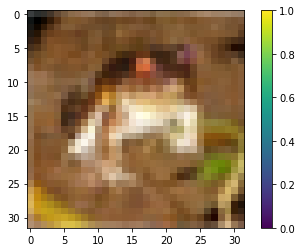

In [10]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
print(y_train[0])

### 建立CNN模型

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), verbose=2)

Epoch 1/15
782/782 - 4s - loss: 1.4544 - sparse_categorical_accuracy: 0.4769 - val_loss: 1.1412 - val_sparse_categorical_accuracy: 0.5955
Epoch 2/15
782/782 - 4s - loss: 1.1138 - sparse_categorical_accuracy: 0.6070 - val_loss: 1.0261 - val_sparse_categorical_accuracy: 0.6431
Epoch 3/15
782/782 - 4s - loss: 0.9920 - sparse_categorical_accuracy: 0.6522 - val_loss: 1.0144 - val_sparse_categorical_accuracy: 0.6496
Epoch 4/15
782/782 - 4s - loss: 0.9136 - sparse_categorical_accuracy: 0.6801 - val_loss: 0.9212 - val_sparse_categorical_accuracy: 0.6752
Epoch 5/15
782/782 - 4s - loss: 0.8481 - sparse_categorical_accuracy: 0.7024 - val_loss: 0.9118 - val_sparse_categorical_accuracy: 0.6817
Epoch 6/15
782/782 - 4s - loss: 0.7901 - sparse_categorical_accuracy: 0.7223 - val_loss: 0.8896 - val_sparse_categorical_accuracy: 0.6938
Epoch 7/15
782/782 - 4s - loss: 0.7406 - sparse_categorical_accuracy: 0.7390 - val_loss: 0.8712 - val_sparse_categorical_accuracy: 0.6932
Epoch 8/15
782/782 - 4s - loss: 0.

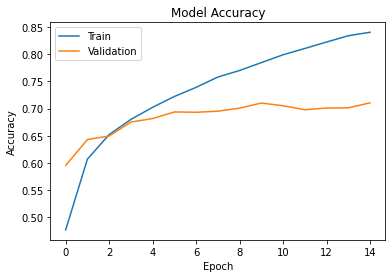

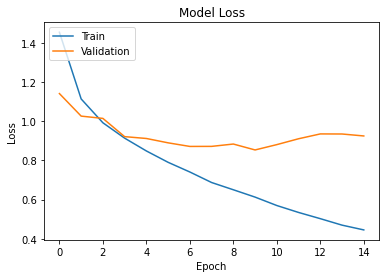

In [15]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [16]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [17]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
mat = confusion_matrix(y_test, y_pred)

In [23]:
!pip install mlxtend==0.17

     |████████████████████████████████| 1.3MB 8.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7e600ce828>)

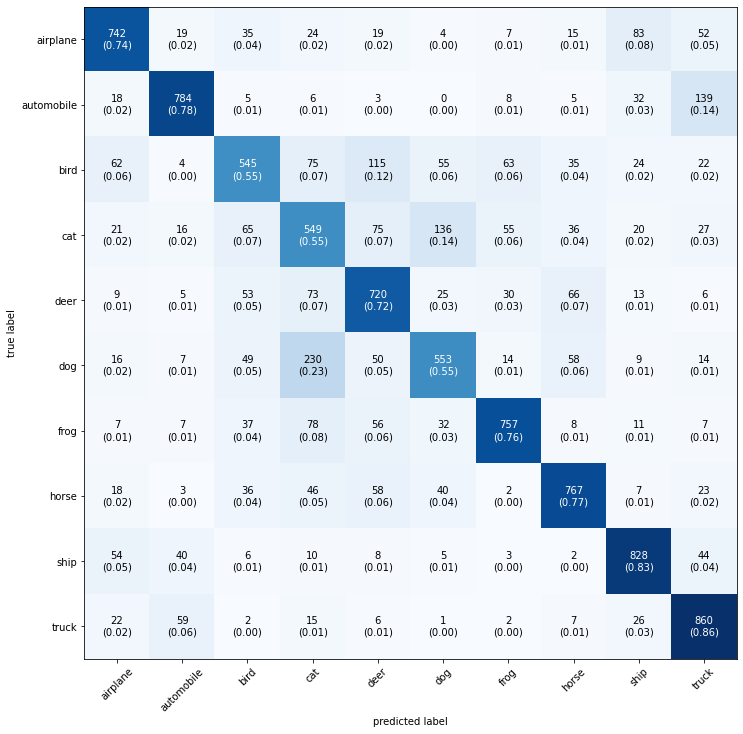

In [20]:
plot_confusion_matrix(mat, figsize=(12, 12), class_names=class_names, show_normed=True)